<a href="https://colab.research.google.com/github/odraudE31/AE_398_Azul_Project/blob/main/colabs/mgt_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checking if groundtime_standard_min is MGT max

In [ ]:
import pandas as pd

# Aircraft MGT dictionary
aircrafts = {
    'ATR': 30,
    'E1': 35,
    'E2': 40,
    'A320': 40,
    'A321': 50,
}

# Load the dataframe
df = pd.read_excel('/Aligned_APU_to_D0D14 (third iteration).xlsx', engine='openpyxl')

# Function to determine if groundtime_standard_min corresponds_to_mgt max based on aircraft type
def corresponds_to_mgt(row):
  equipment_type = row['equipmenttype']
  ground_time = row['groundtime_standard_min']
  if equipment_type in aircrafts:
    if ground_time == aircrafts[equipment_type]:
      return 1
    else:
      return 0
  else:
    return -1  # Handle cases where aircraft type is not in the dictionary

# Apply the function to create a new 'MGT' column
df['corresponds_to_mgt'] = df.apply(corresponds_to_mgt, axis=1)

# Create the pie chart
mgt_counts = df['corresponds_to_mgt'].value_counts()

print("Corresponds:", mgt_counts[1])
print("Doesn't correspond:", mgt_counts[0])
print("Aircraft with no data:", mgt_counts[-1])




Corresponds: 41270
Doesn't correspond: 45280
Aircraft with no data: 2131


DOESN'T

# Graphing how many flights were MGT

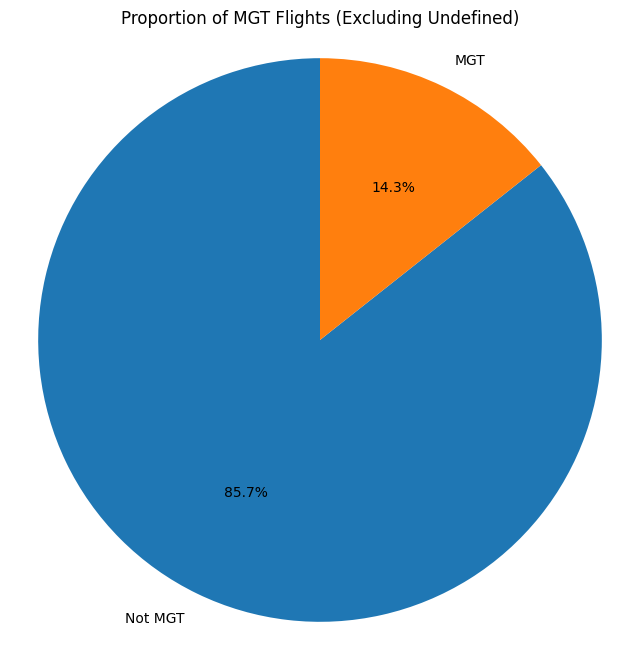

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ERROR_MARGIN_MINUTES = 10

# Aircraft MGT dictionary
aircrafts = {
    'ATR': 30,
    'E1': 35,
    'E2': 40,
    'A320': 40,
    'A321': 50,
}

# Load the dataframe
df = pd.read_excel('/Aligned_APU_to_D0D14 (third iteration).xlsx', engine='openpyxl')

# Convert 'endutc' column to datetime
df['endutc'] = pd.to_datetime(df['endutc']) # This line converts the 'endutc' column to datetime objects

# Function to determine if a flight is MGT based on ground time and aircraft type
def is_mgt(row):
  equipment_type = row['equipmenttype']
  ground_time = (row['endutc'] - row['apu_start_time']).total_seconds() / 60
  if equipment_type in aircrafts:
    if ground_time <= (aircrafts[equipment_type] + ERROR_MARGIN_MINUTES):
      return 1
    else:
      return 0
  else:
    return -1  # Handle cases where aircraft type is not in the dictionary

# Apply the function to create a new 'MGT' column
df['MGT'] = df.apply(is_mgt, axis=1)

# Filter out 'Undefined' values
filtered_df = df[df['MGT'] != -1]

# Create the pie chart using the filtered DataFrame
mgt_counts = filtered_df['MGT'].value_counts()

# Remap values for labels (no need for 'Undefined' anymore)
mgt_counts = mgt_counts.rename(index={0: 'Not MGT', 1: 'MGT'})

plt.figure(figsize=(8, 8))
plt.pie(mgt_counts, labels=mgt_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of MGT Flights (', ERROR_MARGIN_MINUTES ,' minutes margin)')
plt.axis('equal')
plt.show()